**PIA - RIESGO CREDITICIO**

*Estadística Aplicada: Grupo 051*

*Equipo ERLI:* 

Jessica Lizeth Hernández Bracho 1842553

Erika Denisse Cardona Padilla 1888872


**INTRODUCCION**

Se tiene una base de datos de riesgo crediticio en la cual la problemática a analizar es acerca de préstamos, si estos fueron pagados o no y si lo fueron, cual fue la duración de tiempo que se tardaron en hacerlo. 

La sostenibilidad de las instituciones financieras, es un elemento relevante en el buen funcionamiento del engranaje denominado sistema financiero, por lo tanto, para las entidades financieras el modelo a presentarse les sería de punto clave.

Es de suma importancia llevar a cabo un modelo de supervivencia para una base de riesgo crediticio ya que nos permite estimar la probabilidad de que un cliente pueda ser buen o  mal pagador, de acuerdo a sus particularidades y mejorar los procesos de selección de  clientes y posteriormente de gestión de cobranzas.

En nuestra base de datos podemos encontrarnos con datos censurados, significando esto que no sabemos las razones por las cuales el cliente dejó de pagar el préstamo, simplemente dejamos de recibir información sobre este. 

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [158]:
pip install lifelines

In [159]:
from lifelines import*

In [160]:
cr=pd.read_csv("basedatos.csv")

In [161]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   checking_account_status  1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings_account_status   1000 non-null   int64
 6   employment_years         1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status          1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [162]:
cr

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,3,6,2,8,1169,1,5,4,3,3,...,1,67,3,1,2,2,1,1,1,1
1,1,48,4,8,5951,2,3,2,1,3,...,1,22,3,1,1,2,1,0,1,0
2,4,12,2,5,2096,2,4,2,3,3,...,1,49,3,1,1,4,2,0,1,1
3,3,42,4,6,7882,2,4,2,3,2,...,2,45,3,3,1,2,2,0,1,1
4,3,24,3,2,4870,2,3,3,3,3,...,3,53,3,3,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,4,6,1736,2,4,3,1,3,...,1,31,3,1,1,4,1,0,1,1
996,3,30,4,3,3857,2,3,4,2,3,...,2,40,3,1,1,1,1,1,1,1
997,4,12,4,8,804,2,5,4,3,3,...,4,38,3,1,1,2,1,0,1,1
998,3,45,4,8,1845,2,3,4,3,3,...,3,23,3,3,1,2,1,1,1,0


In [163]:
cr.isnull().sum()

checking_account_status    0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings_account_status     0
employment_years           0
installment_rate           0
personal_status            0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_of_credits          0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
full_repaid                0
dtype: int64

In [164]:
cr.drop_duplicates(inplace=True)

In [165]:
cr.describe()

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.793000,20.903000,3.219000,4.870000,3271.258000,2.190000,3.384000,2.973000,2.238000,2.866000,...,2.536000,35.546000,2.675000,1.395000,1.407000,2.274000,1.155000,0.404000,0.963000,0.700000
std,1.221328,12.058814,1.064035,2.720018,2822.736876,0.966869,1.208306,1.118715,0.895633,0.445244,...,1.215805,11.375469,0.705601,0.674856,0.577654,0.946478,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,1.000000,1.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,2.000000,2.000000,1365.500000,2.000000,3.000000,2.000000,1.000000,3.000000,...,1.000000,27.000000,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,3.000000,18.000000,4.000000,6.000000,2319.500000,2.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,33.000000,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,8.000000,3972.250000,2.000000,5.000000,4.000000,3.000000,3.000000,...,4.000000,42.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,5.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,3.000000,3.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000


Full_repaid se encarga de definir si el prestatario pagó o no el préstamo en su totalidad. Tomando en cuenta que la variable duration sirve para saber cual fue el plazo que tarda el prestatario en pagar y que la variable foreign_worker sirve para saber si el prestatario es trabajador extranjero o no, podemos decir que el préstamo puede ser pagado por personas que son trabajadores extranjeros o que en su defecto no puedan, y que los préstamos  pueden ser comúnmente más utilizados de acuerdo a su situación residencial.

In [166]:
cr["duration"].mean()

20.903

El tiempo promedio de supervivencia de los datos es de 20.9 meses, esto quiere decir que la media que se tarda en pagar un prestatario es de aproximadamente 1 año y nueve meses.

In [167]:
from lifelines import KaplanMeierFitter

In [168]:
kmf = KaplanMeierFitter()

,Full repaid
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


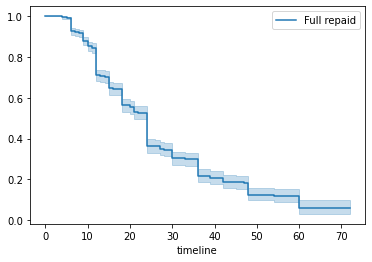

In [169]:
kmf.fit(cr['duration'], cr['full_repaid'], label = "Full repaid").plot()
kmf.survival_function_

In [170]:
from lifelines.utils import median_survival_times

In [171]:
mediana = kmf.median_survival_time_
mediana

24.0

La mediana es el punto medio del conjunto de datos por lo tanto el valor de este punto medio es 24 (dos años) por lo cual la mitad de las observaciones está por encima de este valor y la otra mitad está por debajo.

In [172]:
own = cr[cr['housing']==1]
rent = cr[cr['housing']==2]
free = cr[cr['housing']==3]

down = own['duration']
frown = own['full_repaid']

drent = rent['duration']
frrent = rent['full_repaid']

dfree = free['duration']
frfree = free['full_repaid']

In [173]:
#Funcion de supervivencia own
kmf.fit(down,frown,label='Own')
kmf.survival_function_

,Own
timeline,
0.0,1.000000
4.0,0.992987
5.0,0.991585
6.0,0.920056
7.0,0.915810
8.0,0.908732
9.0,0.871873
10.0,0.848853
11.0,0.837324


<AxesSubplot:xlabel='timeline'>

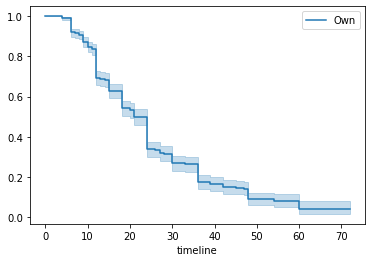

In [174]:
kmf.plot()

In [175]:
#Funcion de supervivencia rent
kmf.fit(drent,frrent,label='Rent')
kmf.survival_function_

,Rent
timeline,
0.0,1.000000
4.0,0.994413
6.0,0.927374
7.0,0.921720
9.0,0.876482
10.0,0.842110
11.0,0.836342
12.0,0.697913
15.0,0.615432


<AxesSubplot:xlabel='timeline'>

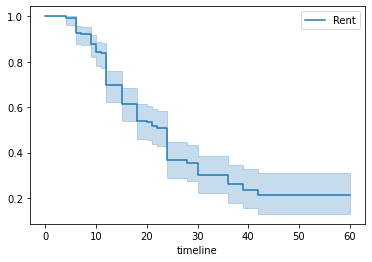

In [176]:
kmf.plot()

In [177]:
#Funcion de supervivencia free
kmf.fit(dfree,frfree,label='free')
kmf.survival_function_

,free
timeline,
0.0,1.000000
6.0,0.972222
7.0,0.962874
8.0,0.953526
9.0,0.944177
10.0,0.915274
12.0,0.856852
14.0,0.846652
15.0,0.805849


<AxesSubplot:xlabel='timeline'>

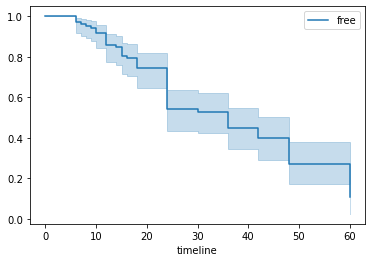

In [178]:
kmf.plot()

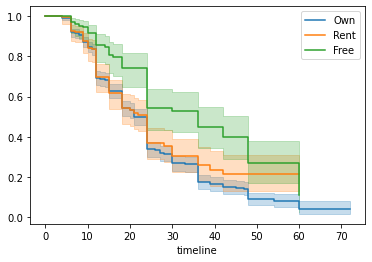

In [180]:
ax = plt.subplot(111)
ax = kmf.fit(down, frown, label = "Own").plot(ax=ax)
ax = kmf.fit(drent, frrent, label = "Rent").plot(ax=ax)
ax = kmf.fit(dfree, frfree, label = "Free").plot(ax=ax)

In [181]:
from lifelines.statistics import logrank_test

Planteamos la hipótesis:

*H0: Funciones de supervivencia iguales*

In [192]:
results = logrank_test(down, drent, event_observed_A = frown, event_observed_B = frrent)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.49 0.22      2.17

In [193]:
results = logrank_test(down, dfree, event_observed_A = frown, event_observed_B = frfree)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          27.75 <0.005     22.79

In [194]:
results = logrank_test(drent, dfree, event_observed_A = frrent, event_observed_B = frfree)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.11 <0.005      9.41

La funcion de supervivencia de 'Own' es igual a la funcion de supervivencia de 'rent'. Mientras que en las otras dos puebas de Log Rank-Test podemos observar que H0 fue rechazada porque tienen un p-valor menor a alpha, queriéndonos decir que entre ellas no son funciones de supervivencia iguales y mientras que al menos una haya sido rechazada quiere decir que no existe evidencia estadística para afirmar que las tres funciones de supervivencia son iguales.

In [185]:
cate = ['full_repaid','personal_status','employment_years', 'job','housing','purpose','checking_account_status','credit_history','other_installment_plans','savings_account_status','property','other_debtors']
for i in cate:
    cr[i] = cr[i].astype('category')
    cr[i] = cr[i].cat.codes

In [186]:
from lifelines import CoxPHFitter

In [187]:
cph = CoxPHFitter()

In [188]:
cph.fit(cr, duration_col='duration', event_col='full_repaid')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>

In [189]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4010.21
         time fit was run = 2022-05-24 01:04:29 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
checking_account_status   0.15       1.16       0.03             0.08             0.22                 1.09                 1.24
credit_history           -0.07       0.93       0.04            -0.15             0.00                 0.86                 1.00
purpose                   0.04       1.04       0.01             0.01             0.06                 1.01                 1.07
amount                   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
savings_account_status    0.01       1.01       0.04            -0.06             0.09                 0.94                 1.09
employment_years          0.02       1.02       0.04            -0.05             0.09                 0.95                 1.09
installment_rate         -0.43       0.65       0.04            -0.51            -0.36                 0.60                 0.70
personal_status           0.06       1.06       0.05            -0.04             0.16                 0.96                 1.17
other_debtors             0.16       1.17       0.09            -0.03             0.34                 0.97                 1.40
present_residence        -0.01       0.99       0.04            -0.09             0.06                 0.92                 1.06
property                 -0.10       0.91       0.03            -0.16            -0.03                 0.85                 0.97
age                       0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
other_installment_plans   0.16       1.17       0.06             0.04             0.28                 1.04                 1.32
housing                  -0.08       0.92       0.06            -0.20             0.05                 0.82                 1.05
number_of_credits         0.06       1.06       0.07            -0.09             0.20                 0.92                 1.22
job                       0.04       1.05       0.05            -0.05             0.14                 0.95                 1.15
people_liable             0.02       1.02       0.11            -0.20             0.24                 0.82                 1.27
telephone                 0.13       1.14       0.08            -0.03             0.29                 0.97                 1.34
foreign_worker           -1.17       0.31       0.19            -1.54            -0.79                 0.21                 0.45

                          cmp to      z      p   -log2(p)
covariate                                                
checking_account_status     0.00   4.34 <0.005      16.10
credit_history              0.00  -1.88   0.06       4.05
purpose                     0.00   2.62   0.01       6.83
amount                      0.00 -15.21 <0.005     171.12
savings_account_status      0.00   0.33   0.74       0.43
employment_years            0.00   0.59   0.55       0.85
installment_rate            0.00 -11.23 <0.005      94.88
personal_status             0.00   1.22   0.22       2.18
other_debtors               0.00   1.68   0.09       3.43
present_residence           0.00  -0.37   0.71       0.49
property                    0.00  -3.03 <0.005       8.68
age                         0.00   3.40 <0.005      10.52
other_installment_plans     0.00   2.63   0.01       6.85
housing                     0.00  -1.23   0.22    

<AxesSubplot:xlabel='log(HR) (95% CI)'>

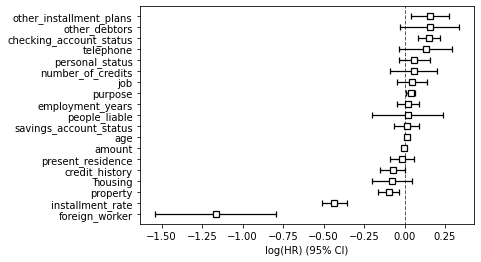

In [190]:
cph.plot()

*Variables que sí afectan el riesgo de sufrir el evento por su p-valor < alpha:*
1. **Checking_account_status**: El estado de la cuenta **aumenta el riesgo en %16**
2. **Purpose:** La razón para obtener un préstamo **aumenta el riesgo en 4%**
3. **Amount**: Con un p-valor menor a alpha **no aumenta ni reduce el riesgo porque tiene un valor de 0%**
4. **Installment_rate**: Porcentaje de la cantidad prestada que será cobrada por un prestamista a un prestatario. **reduce el riesgo en 35%**
5. **Property**: Según el tipo de activos valiosos que posee el prestatario **reduce el riesgo en 9%**
6. **Age**: Edad del prestatario **aumenta el riesgo 1%**
7. **Other_installment_plans:** Los tipos de planes de cuotas que el prestatario ya tiene **aumenta el riesgo en 17%**
8. **Foreign_worker**: Si el prestatario es un trabajador extranjero **reduce el riesgo en 69%**

*Recomendaciones*

• Verificar que se cumplan a cabalidad los requisitos y políticas de crédito al momento de la concesión crediticia, especialmente cuando el entorno económico presenta un desempeño por debajo del crecimiento de largo plazo, dado que la necesidad de generar mayores volúmenes de colocación crediticia hipotecario conduce a otorgar créditos a quienes no necesariamente dan indicios de ser buenos clientes.

• Considerar que si todos los pagos fueron hechos a tiempo, el interés disminuya cierto porcentaje, sin que esto afecte a la entidad financiera, así el prestatario tendrá motivación de hacer los pagos en tiempo y forma.

• Llevar a cabo un estudio donde la cuota vaya decreciendo mes tras mes para que cada vez se vea más atractivo pagarlo.

• Implementación de nuevo formato de los estados de cuenta con el fin de que sean más entendibles y visibles para los prestatarios, sumado a esto, explicaciones de parte de las entidades financieras. 

**Limitaciones del estimador de Kaplan Meier**

1. No puede modelar el impacto de las covariables en la supervivencia.
2. Cantidad de datos.
3. No puede ser utilizado para la agrupación de tiempos en intervalos.

**Limitaciones del modelo de Cox**

1. Tiene que existir un conjunto de variables independientes cuyos valores influyen en el tiempo que transucrre hasta que ocurre el suceso final.
2. Variables cualitativas deben ser tratadas de forma ligeramente distinta a las variables cuantitativas.
3. Únicamenete el riesgo base depende del tiempo.